# 資料處理

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

import warnings
warnings.filterwarnings("ignore")

In [2]:
workpath = '.'

In [3]:
train_meta = pd.read_csv('%s/train.csv' % (workpath))
test_meta = pd.read_csv('%s/test.csv' % (workpath))

In [49]:
train_meta

,PID,UID,EF
0,P00001,U00001,61.0
1,P00001,U00002,70.0
2,P00001,U00003,68.0
3,P00001,U00004,69.0
4,P00002,U00007,61.0
...,...,...,...
9801,P03070,U13964,70.0
9802,P03071,U13965,64.0
9803,P03071,U13966,51.0
9804,P03071,U13967,50.0


In [50]:
train_pid = set(train_meta.PID)
test_pid = set(test_meta.PID)
pid_idx = []

for idx, pid in enumerate(train_meta.PID):
    if pid in test_pid:
        pid_idx.append(idx)

In [6]:
# train_meta_n = train_meta.iloc[pid_idx,:]
# len(train_meta_n)

In [7]:
# train_meta_mean = train_meta.groupby('PID').mean()
# train_meta_mean

In [65]:
train_meta_n = train_meta.iloc[pid_idx,:]

In [127]:
train_meta_n['RK'] = train_meta_n.groupby('PID')['UID'].rank('first')

In [149]:
train_meta_n['IDX'] = train_meta_n.index

In [165]:
train_meta_n

,PID,UID,EF,RK,IDX
0,P00001,U00001,61.0,1.0,0
1,P00001,U00002,70.0,2.0,1
2,P00001,U00003,68.0,3.0,2
3,P00001,U00004,69.0,4.0,3
4,P00002,U00007,61.0,1.0,4
...,...,...,...,...,...
9781,P03064,U13938,64.0,3.0,9781
9794,P03068,U13953,63.0,1.0,9794
9795,P03068,U13954,67.0,2.0,9795
9796,P03069,U13957,75.0,1.0,9796


In [166]:
train_meta_valid = train_meta_n.groupby('PID').last()
train_meta_valid['PID'] = train_meta_valid.index
train_meta_valid

,UID,EF,RK,IDX,PID
PID,,,,,
P00001,U00004,69.0,4.0,3,P00001
P00002,U00008,62.0,2.0,5,P00002
P00005,U00023,66.0,2.0,18,P00005
P00006,U00027,68.0,2.0,20,P00006
P00007,U00031,68.0,2.0,22,P00007
...,...,...,...,...,...
P03062,U13929,66.0,3.0,9776,P03062
P03063,U13933,74.0,2.0,9778,P03063
P03064,U13938,64.0,3.0,9781,P03064


In [182]:
train_meta_train = train_meta_n.drop(train_meta_valid.IDX)
train_meta_train

,PID,UID,EF,RK,IDX
0,P00001,U00001,61.0,1.0,0
1,P00001,U00002,70.0,2.0,1
2,P00001,U00003,68.0,3.0,2
4,P00002,U00007,61.0,1.0,4
17,P00005,U00022,69.0,1.0,17
...,...,...,...,...,...
9777,P03063,U13932,69.0,1.0,9777
9779,P03064,U13936,70.0,1.0,9779
9780,P03064,U13937,80.0,2.0,9780
9794,P03068,U13953,63.0,1.0,9794


In [184]:
train_meta_train.groupby('PID')['EF'].mean()

PID
P00001    66.333333
P00002    61.000000
P00005    69.000000
P00006    55.000000
P00007    73.000000
            ...    
P03062    67.500000
P03063    69.000000
P03064    75.000000
P03068    63.000000
P03069    75.000000
Name: EF, Length: 2081, dtype: float64

## 繪圖觀察

In [8]:
def plot_data(uid, workpath):
    uid_data = pd.read_csv('%s/ecg/%s.csv' % (workpath, uid))
    f = plt.figure(figsize=(20,4))
    f.add_subplot(3,4,1).plot(uid_data.leadI)
    f.add_subplot(3,4,2).plot(uid_data.leadII)
    f.add_subplot(3,4,3).plot(uid_data.leadIII)
    f.add_subplot(3,4,4).plot(uid_data.leadaVR)
    f.add_subplot(3,4,5).plot(uid_data.leadaVL)
    f.add_subplot(3,4,6).plot(uid_data.leadaVF)
    f.add_subplot(3,4,7).plot(uid_data.leadV1)
    f.add_subplot(3,4,8).plot(uid_data.leadV2)
    f.add_subplot(3,4,9).plot(uid_data.leadV3)
    f.add_subplot(3,4,10).plot(uid_data.leadV4)
    f.add_subplot(3,4,11).plot(uid_data.leadV5)
    f.add_subplot(3,4,12).plot(uid_data.leadV6)
    f.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    
    return f.show

<bound method Figure.show of <Figure size 1440x288 with 12 Axes>>

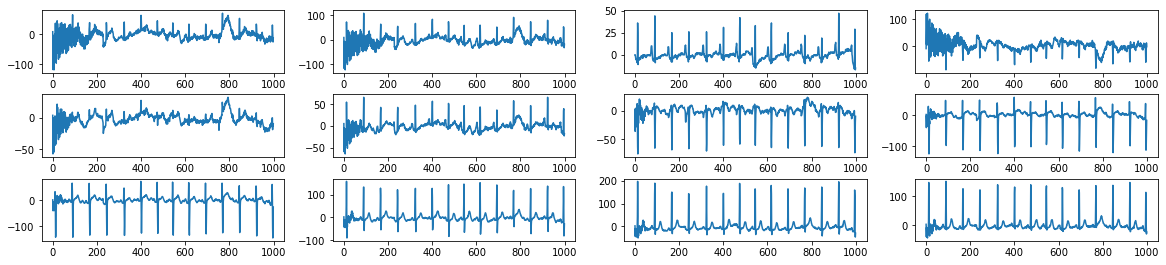

In [9]:
# EF = 80
plot_data('U00085', workpath)

<bound method Figure.show of <Figure size 1440x288 with 12 Axes>>

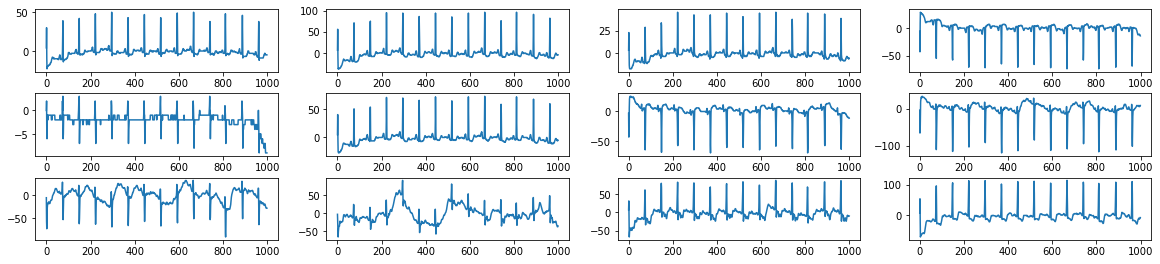

In [10]:
# EF = 61
plot_data('U00001', workpath)

<bound method Figure.show of <Figure size 1440x288 with 12 Axes>>

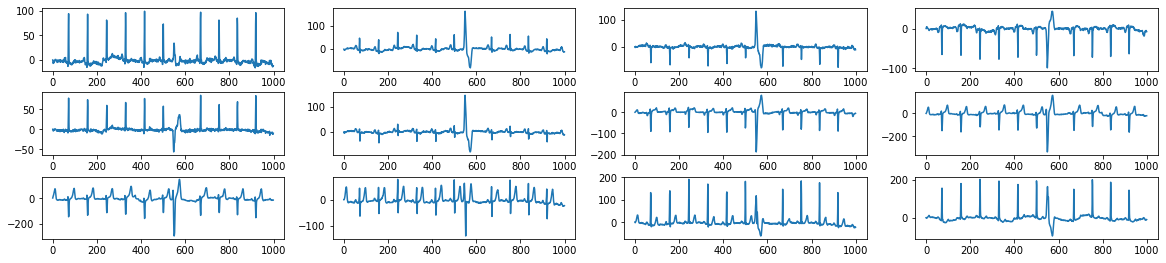

In [11]:
# EF = 36
plot_data('U01291', workpath)

<bound method Figure.show of <Figure size 1440x288 with 12 Axes>>

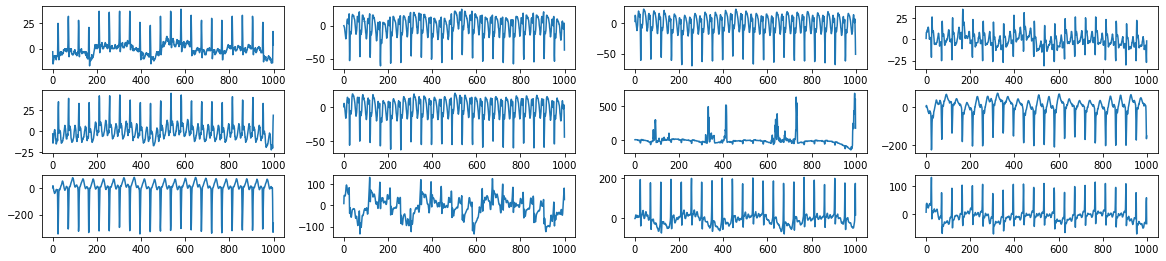

In [12]:
# EF = 20
plot_data('U00122', workpath)

<bound method Figure.show of <Figure size 1440x288 with 12 Axes>>

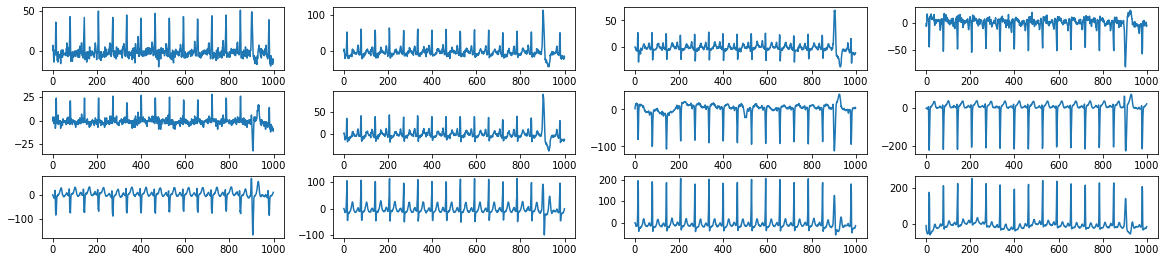

In [13]:
# EF = 10
plot_data('U07856', workpath)

## 標準化處理

- 訊號各別MinMax處理

In [196]:
from sklearn import preprocessing

In [197]:
x_train = []

for i, uid in enumerate(train_meta['UID']):
    print('處理',uid,'>>>',i+1,'/',len(train_meta['UID']))
    ecg = pd.read_csv('ecg/{}.csv'.format(uid))
    ecg = ecg.drop(range(800,1000))
    ecg = ecg.drop(range(0,200))
    ecg_scaled = preprocessing.MinMaxScaler().fit_transform(ecg)
    x_train.append(ecg_scaled)
    # x_train = pd.concat([x_train,ecg],axis = 0)

處理 U00001 >>> 1 / 9806
處理 U00002 >>> 2 / 9806
處理 U00003 >>> 3 / 9806
處理 U00004 >>> 4 / 9806
處理 U00007 >>> 5 / 9806
處理 U00008 >>> 6 / 9806
處理 U00011 >>> 7 / 9806
處理 U00012 >>> 8 / 9806
處理 U00013 >>> 9 / 9806
處理 U00014 >>> 10 / 9806
處理 U00015 >>> 11 / 9806
處理 U00016 >>> 12 / 9806
處理 U00017 >>> 13 / 9806
處理 U00018 >>> 14 / 9806
處理 U00019 >>> 15 / 9806
處理 U00020 >>> 16 / 9806
處理 U00021 >>> 17 / 9806
處理 U00022 >>> 18 / 9806
處理 U00023 >>> 19 / 9806
處理 U00026 >>> 20 / 9806
處理 U00027 >>> 21 / 9806
處理 U00030 >>> 22 / 9806
處理 U00031 >>> 23 / 9806
處理 U00034 >>> 24 / 9806
處理 U00035 >>> 25 / 9806
處理 U00038 >>> 26 / 9806
處理 U00039 >>> 27 / 9806
處理 U00040 >>> 28 / 9806
處理 U00043 >>> 29 / 9806
處理 U00044 >>> 30 / 9806
處理 U00045 >>> 31 / 9806
處理 U00048 >>> 32 / 9806
處理 U00049 >>> 33 / 9806
處理 U00052 >>> 34 / 9806
處理 U00053 >>> 35 / 9806
處理 U00054 >>> 36 / 9806
處理 U00055 >>> 37 / 9806
處理 U00056 >>> 38 / 9806
處理 U00057 >>> 39 / 9806
處理 U00058 >>> 40 / 9806
處理 U00059 >>> 41 / 9806
處理 U00060 >>> 42 / 9806
處

In [198]:
x_test = []

for i, uid in enumerate(test_meta['UID']):
    print('處理',uid,'>>>',i+1,'/',len(test_meta['UID']))
    ecg = pd.read_csv('ecg/{}.csv'.format(uid))
    ecg = ecg.drop(range(800,1000))
    ecg = ecg.drop(range(0,200))
    ecg_scaled = preprocessing.MinMaxScaler().fit_transform(ecg)
    x_test.append(ecg_scaled)
    # x_test = pd.concat([x_test,ecg],axis = 0)

處理 U00005 >>> 1 / 4162
處理 U00006 >>> 2 / 4162
處理 U00009 >>> 3 / 4162
處理 U00010 >>> 4 / 4162
處理 U00024 >>> 5 / 4162
處理 U00025 >>> 6 / 4162
處理 U00028 >>> 7 / 4162
處理 U00029 >>> 8 / 4162
處理 U00032 >>> 9 / 4162
處理 U00033 >>> 10 / 4162
處理 U00036 >>> 11 / 4162
處理 U00037 >>> 12 / 4162
處理 U00041 >>> 13 / 4162
處理 U00042 >>> 14 / 4162
處理 U00046 >>> 15 / 4162
處理 U00047 >>> 16 / 4162
處理 U00050 >>> 17 / 4162
處理 U00051 >>> 18 / 4162
處理 U00062 >>> 19 / 4162
處理 U00063 >>> 20 / 4162
處理 U00066 >>> 21 / 4162
處理 U00067 >>> 22 / 4162
處理 U00070 >>> 23 / 4162
處理 U00071 >>> 24 / 4162
處理 U00074 >>> 25 / 4162
處理 U00075 >>> 26 / 4162
處理 U00078 >>> 27 / 4162
處理 U00079 >>> 28 / 4162
處理 U00083 >>> 29 / 4162
處理 U00084 >>> 30 / 4162
處理 U00087 >>> 31 / 4162
處理 U00088 >>> 32 / 4162
處理 U00091 >>> 33 / 4162
處理 U00092 >>> 34 / 4162
處理 U00095 >>> 35 / 4162
處理 U00096 >>> 36 / 4162
處理 U00104 >>> 37 / 4162
處理 U00105 >>> 38 / 4162
處理 U00108 >>> 39 / 4162
處理 U00109 >>> 40 / 4162
處理 U00112 >>> 41 / 4162
處理 U00113 >>> 42 / 4162
處

In [199]:
# sc = preprocessing.MinMaxScaler()

In [200]:
# sc.fit(x_train)

In [201]:
# x_train_sc = sc.transform(x_train)
# x_test_sc = sc.transform(x_test)

In [206]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(train_meta['EF']<=35)*1

In [207]:
print(x_train.shape)
# print(x_train_sc.shape)
print(x_test.shape)
# print(x_test_sc.shape)
print(y_train.shape)

(9806, 600, 12)
(4162, 600, 12)
(9806,)


In [23]:
# x_train_sc = x_train_sc.reshape(9806,600,12)
# x_test_sc = x_test_sc.reshape(4162,600,12)

## 切分 training & validation

In [204]:
# from sklearn.model_selection import train_test_split

# X, X_val, y, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=2022, shuffle=True)

In [208]:
X = x_train[train_meta_train.IDX]
X_val = x_train[train_meta_valid.IDX]
y = y_train[train_meta_train.IDX]
y_val = y_train[train_meta_valid.IDX]

In [209]:
print(X.shape)
print(X_val.shape)
print(y.shape)
print(y_val.shape)

(3223, 600, 12)
(2081, 600, 12)
(3223,)
(2081,)


In [210]:
train_data = {'X':X, 'y':y}
valid_data = {'X':X_val, 'y':y_val}
test_data = {'X':x_test}

In [211]:
np.savez("%s/dataset/train_data.npz" % (workpath), **train_data)
np.savez("%s/dataset/valid_data.npz" % (workpath), **valid_data)
np.savez("%s/dataset/test_data.npz" % (workpath), **test_data)

## resize to 1000 X 36 X 3

- 接在前置作業後

In [212]:
def data_repeat3(data):
    repeat3 = []
    n = data.shape[0]
    for i in range(n):
        repeat3.append(data[i].repeat(3,axis=1))
        print(i,'/',n)
    return np.array(repeat3)

def data_redim3(data):
    data_dim = data.shape
    data = data.reshape(data_dim[0],data_dim[1],data_dim[2],1)
    data = data.repeat(3,axis=3)
    return data

In [213]:
x_train_repeat3 = data_repeat3(train_data['X'])

0 / 3223
1 / 3223
2 / 3223
3 / 3223
4 / 3223
5 / 3223
6 / 3223
7 / 3223
8 / 3223
9 / 3223
10 / 3223
11 / 3223
12 / 3223
13 / 3223
14 / 3223
15 / 3223
16 / 3223
17 / 3223
18 / 3223
19 / 3223
20 / 3223
21 / 3223
22 / 3223
23 / 3223
24 / 3223
25 / 3223
26 / 3223
27 / 3223
28 / 3223
29 / 3223
30 / 3223
31 / 3223
32 / 3223
33 / 3223
34 / 3223
35 / 3223
36 / 3223
37 / 3223
38 / 3223
39 / 3223
40 / 3223
41 / 3223
42 / 3223
43 / 3223
44 / 3223
45 / 3223
46 / 3223
47 / 3223
48 / 3223
49 / 3223
50 / 3223
51 / 3223
52 / 3223
53 / 3223
54 / 3223
55 / 3223
56 / 3223
57 / 3223
58 / 3223
59 / 3223
60 / 3223
61 / 3223
62 / 3223
63 / 3223
64 / 3223
65 / 3223
66 / 3223
67 / 3223
68 / 3223
69 / 3223
70 / 3223
71 / 3223
72 / 3223
73 / 3223
74 / 3223
75 / 3223
76 / 3223
77 / 3223
78 / 3223
79 / 3223
80 / 3223
81 / 3223
82 / 3223
83 / 3223
84 / 3223
85 / 3223
86 / 3223
87 / 3223
88 / 3223
89 / 3223
90 / 3223
91 / 3223
92 / 3223
93 / 3223
94 / 3223
95 / 3223
96 / 3223
97 / 3223
98 / 3223
99 / 3223
100 / 3223

In [214]:
x_test_repeat3 = data_repeat3(test_data['X'])

0 / 4162
1 / 4162
2 / 4162
3 / 4162
4 / 4162
5 / 4162
6 / 4162
7 / 4162
8 / 4162
9 / 4162
10 / 4162
11 / 4162
12 / 4162
13 / 4162
14 / 4162
15 / 4162
16 / 4162
17 / 4162
18 / 4162
19 / 4162
20 / 4162
21 / 4162
22 / 4162
23 / 4162
24 / 4162
25 / 4162
26 / 4162
27 / 4162
28 / 4162
29 / 4162
30 / 4162
31 / 4162
32 / 4162
33 / 4162
34 / 4162
35 / 4162
36 / 4162
37 / 4162
38 / 4162
39 / 4162
40 / 4162
41 / 4162
42 / 4162
43 / 4162
44 / 4162
45 / 4162
46 / 4162
47 / 4162
48 / 4162
49 / 4162
50 / 4162
51 / 4162
52 / 4162
53 / 4162
54 / 4162
55 / 4162
56 / 4162
57 / 4162
58 / 4162
59 / 4162
60 / 4162
61 / 4162
62 / 4162
63 / 4162
64 / 4162
65 / 4162
66 / 4162
67 / 4162
68 / 4162
69 / 4162
70 / 4162
71 / 4162
72 / 4162
73 / 4162
74 / 4162
75 / 4162
76 / 4162
77 / 4162
78 / 4162
79 / 4162
80 / 4162
81 / 4162
82 / 4162
83 / 4162
84 / 4162
85 / 4162
86 / 4162
87 / 4162
88 / 4162
89 / 4162
90 / 4162
91 / 4162
92 / 4162
93 / 4162
94 / 4162
95 / 4162
96 / 4162
97 / 4162
98 / 4162
99 / 4162
100 / 4162

In [215]:
x_valid_repeat3 = data_repeat3(valid_data['X'])

0 / 2081
1 / 2081
2 / 2081
3 / 2081
4 / 2081
5 / 2081
6 / 2081
7 / 2081
8 / 2081
9 / 2081
10 / 2081
11 / 2081
12 / 2081
13 / 2081
14 / 2081
15 / 2081
16 / 2081
17 / 2081
18 / 2081
19 / 2081
20 / 2081
21 / 2081
22 / 2081
23 / 2081
24 / 2081
25 / 2081
26 / 2081
27 / 2081
28 / 2081
29 / 2081
30 / 2081
31 / 2081
32 / 2081
33 / 2081
34 / 2081
35 / 2081
36 / 2081
37 / 2081
38 / 2081
39 / 2081
40 / 2081
41 / 2081
42 / 2081
43 / 2081
44 / 2081
45 / 2081
46 / 2081
47 / 2081
48 / 2081
49 / 2081
50 / 2081
51 / 2081
52 / 2081
53 / 2081
54 / 2081
55 / 2081
56 / 2081
57 / 2081
58 / 2081
59 / 2081
60 / 2081
61 / 2081
62 / 2081
63 / 2081
64 / 2081
65 / 2081
66 / 2081
67 / 2081
68 / 2081
69 / 2081
70 / 2081
71 / 2081
72 / 2081
73 / 2081
74 / 2081
75 / 2081
76 / 2081
77 / 2081
78 / 2081
79 / 2081
80 / 2081
81 / 2081
82 / 2081
83 / 2081
84 / 2081
85 / 2081
86 / 2081
87 / 2081
88 / 2081
89 / 2081
90 / 2081
91 / 2081
92 / 2081
93 / 2081
94 / 2081
95 / 2081
96 / 2081
97 / 2081
98 / 2081
99 / 2081
100 / 2081

In [216]:
x_train_redim3 = data_redim3(x_train_repeat3)
x_test_redim3 = data_redim3(x_test_repeat3)
x_valid_redim3 = data_redim3(x_valid_repeat3)

In [217]:
np.savez("%s/dataset/x_train_redim3.npz" % (workpath), X = x_train_redim3)
np.savez("%s/dataset/x_test_redim3.npz" % (workpath), X = x_test_redim3)
np.savez("%s/dataset/x_valid_redim3.npz" % (workpath), X = x_valid_redim3)

In [218]:
print(x_train_redim3.shape)
print(x_test_redim3.shape)
print(x_valid_redim3.shape)

(3223, 600, 36, 3)
(4162, 600, 36, 3)
(2081, 600, 36, 3)


# 模型訓練

## 前置作業

- Script可以從這開始
- 讀取相關資料
- 建立AUC爲衡量函數
- 建立預測函數

In [231]:
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import metrics

import tensorflow as tf
import keras 
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import mean_absolute_error,mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

import warnings
warnings.filterwarnings("ignore")

workpath = '.'

In [232]:
# valid 驗測AUC，Y爲array
def ecg_metrics(model_name, valid_data ,workpath):
    model = keras.models.load_model("%s/model/model_%s.h5" % (workpath, model_name))
    y_pred = model.predict(valid_data['X'])
    plt.plot(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(valid_data['y'], y_pred, pos_label=1)
    print('Valid data AUC:',metrics.auc(fpr, tpr))
    
# valid 驗測AUC，Y爲one hot
def cat_ecg_metrics(model_name, x_valid, y_valid ,workpath):
    model = keras.models.load_model("%s/model/model_%s.h5" % (workpath, model_name))
    y_pred = model.predict(x_valid)
    y_pred = y_pred.T[1]
    plt.plot(y_pred)
    fpr, tpr, thresholds = metrics.roc_curve(y_valid, y_pred, pos_label=1)
    print('Valid data AUC:',metrics.auc(fpr, tpr))

# 預測測試資料，Y爲array
def pred_n_save(model_name, x_test, workpath):
    model = keras.models.load_model("%s/model/model_%s.h5" % (workpath, model_name))
    Y_test = model.predict(x_test)
    # Y_test = Y_test.T[1]
    plt.plot(Y_test)
    sample_submission = pd.read_csv('%s/sample_submission.csv' % (workpath))
    sample_submission['p_LVD'] = Y_test
    sample_submission.to_csv('%s/submit/model_%s.csv' % (workpath, model_name),index=False)

# 預測測試資料，Y爲ont hot
def cat_pred_n_save(model_name, x_test, workpath):
    model = keras.models.load_model("%s/model/model_%s.h5" % (workpath, model_name))
    Y_test = model.predict(x_test)
    Y_test = Y_test.T[1]
    plt.plot(Y_test)
    sample_submission = pd.read_csv('%s/sample_submission.csv' % (workpath))
    sample_submission['p_LVD'] = Y_test
    sample_submission.to_csv('%s/submit/model_%s.csv' % (workpath, model_name),index=False)

# 模型儲存最佳版本
def model_checkpoint(model_name, workpath):
    return ModelCheckpoint('%s/model/model_%s.h5' % (workpath, model_name), verbose=1,
                          monitor='val_loss', save_best_only=True,
                          mode='min')
    
# 設定earlystop條件
estop = EarlyStopping(monitor='val_loss', patience=10, mode='min', verbose=1)

# 設定lr降低條件(0.001 → 0.0002 → 0.00004 → 0.00001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                           patience=5, mode='min', verbose=1,
                           min_lr=1e-4)

# 畫出訓練集的loss
def plot_history_loss(history):
    plt.plot(history.history['val_loss'], color='b', label="validation loss")
    plt.plot(history.history['loss'], color='r', label="training loss")
    plt.title("Test Loss")
    plt.xlabel("Number of Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    return plt

In [233]:
train_data = np.load("%s/dataset/train_data.npz" % (workpath))
valid_data = np.load("%s/dataset/valid_data.npz" % (workpath))
test_data = np.load("%s/dataset/test_data.npz" % (workpath))

In [234]:
print(train_data['X'].shape)
print(valid_data['X'].shape)
print(test_data['X'].shape)

(3223, 600, 12)
(2081, 600, 12)
(4162, 600, 12)


In [235]:
x_train_redim3 = np.load("%s/dataset/x_train_redim3.npz" % (workpath))['X']
x_test_redim3 = np.load("%s/dataset/x_test_redim3.npz" % (workpath))['X']
x_valid_redim3 = np.load("%s/dataset/x_valid_redim3.npz" % (workpath))['X']

In [236]:
print(x_train_redim3.shape)
print(x_test_redim3.shape)
print(x_valid_redim3.shape)

(3223, 600, 36, 3)
(4162, 600, 36, 3)
(2081, 600, 36, 3)


In [237]:
y_train_onthot = to_categorical(train_data['y'], 2)
y_valid_onthot = to_categorical(valid_data['y'], 2)

(2081, 2)

## ResNet

### ResNet50V2

In [8]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2

In [9]:
model = ResNet50V2(include_top=False, weights='imagenet', input_tensor=Input(shape=(1000, 36, 3)))
checkpoint = model_checkpoint('ResNet50V2', workpath)

2022-07-18 08:31:08.793739: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 08:31:08.804041: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 08:31:08.804755: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-18 08:31:08.806370: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [10]:
batch_size = 128
epochs = 50

# 定義輸出層
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()])

# model.summary()

In [11]:
history = model.fit(x_train_redim3, y_train_onthot, 
                    batch_size=batch_size,
                    epochs = epochs,
                    validation_split=0.2, 
                    steps_per_epoch=x_train_redim3.shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

2022-07-18 08:31:12.459335: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2710800000 exceeds 10% of free system memory.
2022-07-18 08:31:15.166556: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 2710800000 exceeds 10% of free system memory.


Epoch 1/50


2022-07-18 08:31:22.771678: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200


61/61 [==============================] - ETA: 0s - loss: 0.2111 - auc: 0.9694 - binary_accuracy: 0.9320
Epoch 1: val_loss improved from inf to 2.29949, saving model to ./model/model_ResNet50V2.h5
61/61 [==============================] - 91s 1s/step - loss: 0.2111 - auc: 0.9694 - binary_accuracy: 0.9320 - val_loss: 2.2995 - val_auc: 0.9280 - val_binary_accuracy: 0.9280 - lr: 0.0010
Epoch 2/50
61/61 [==============================] - ETA: 0s - loss: 0.1717 - auc: 0.9805 - binary_accuracy: 0.9403
Epoch 2: val_loss improved from 2.29949 to 0.38290, saving model to ./model/model_ResNet50V2.h5
61/61 [==============================] - 67s 1s/step - loss: 0.1717 - auc: 0.9805 - binary_accuracy: 0.9403 - val_loss: 0.3829 - val_auc: 0.9237 - val_binary_accuracy: 0.9267 - lr: 0.0010
Epoch 3/50
61/61 [==============================] - ETA: 0s - loss: 0.1748 - auc: 0.9803 - binary_accuracy: 0.9365
Epoch 3: val_loss improved from 0.38290 to 0.24169, saving model to ./model/model_ResNet50V2.h5
61/61 

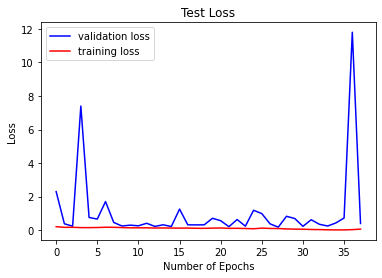

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [12]:
plot_history_loss(history)

Valid data AUC: 0.9137702101070062


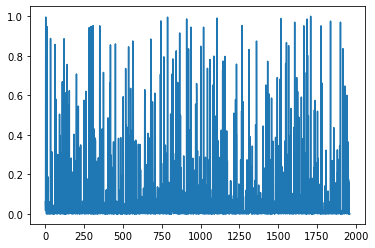

In [13]:
cat_ecg_metrics('ResNet50V2', x_valid_redim3, valid_data['y'], workpath)

2022-07-18 09:12:53.754856: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1797984000 exceeds 10% of free system memory.
2022-07-18 09:12:55.492830: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1797984000 exceeds 10% of free system memory.
2022-07-18 09:13:07.723219: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-18 09:13:07.723281: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.09GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-07-18 09:13:07.731606: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran

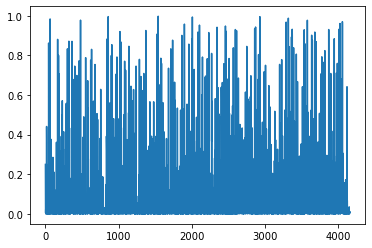

In [14]:
cat_pred_n_save('ResNet50V2', x_test_redim3, workpath)

### ResNet50V2_02

- class 不平衡樣本處理

In [25]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.resnet_v2 import ResNet50V2

In [26]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(train_data['y']),
                                                 y = train_data['y'])

print(class_weights)
class_weights = {
    0:0.53681905,
    1:7.28996283}

[0.53491544 7.66015625]


In [27]:
model = ResNet50V2(include_top=False, weights='imagenet', input_tensor=Input(shape=(1000, 36, 3)))
checkpoint = model_checkpoint('ResNet50V2_02', workpath)

In [28]:
batch_size = 128
epochs = 50

# 定義輸出層
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()])

# model.summary()

In [ ]:
history = model.fit(x_train_redim3, y_train_onthot, 
                    batch_size=batch_size,
                    epochs = epochs,
                    class_weight = class_weights,
                    validation_split=0.2, 
                    steps_per_epoch=x_train_redim3.shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

In [ ]:
plot_history_loss(history)

In [ ]:
cat_ecg_metrics('ResNet50V2_02', x_valid_redim3, valid_data['y'], workpath)

In [ ]:
cat_pred_n_save('ResNet50V2_02', x_test_redim3, workpath)

## DenseNet

### DenseNet121

In [110]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.densenet import DenseNet121

In [111]:
model = DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=(600, 36, 3)))
checkpoint = model_checkpoint('DenseNet121', workpath)

In [112]:
batch_size = 64
epochs = 50

# 定義輸出層
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()])

# model.summary()

In [113]:
history = model.fit(x_train_redim3, y_train_onthot, 
                    batch_size=batch_size,
                    epochs = epochs,
                    validation_split=0.2, 
                    steps_per_epoch=x_train_redim3.shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 0.2221 - auc_4: 0.9686 - binary_accuracy: 0.9238
Epoch 1: val_loss improved from inf to 2.49070, saving model to ./model/model_DenseNet121.h5
66/66 [==============================] - 58s 530ms/step - loss: 0.2221 - auc_4: 0.9686 - binary_accuracy: 0.9238 - val_loss: 2.4907 - val_auc_4: 0.9329 - val_binary_accuracy: 0.9329 - lr: 0.0010
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.1677 - auc_4: 0.9811 - binary_accuracy: 0.9417
Epoch 2: val_loss improved from 2.49070 to 1.47159, saving model to ./model/model_DenseNet121.h5
66/66 [==============================] - 22s 339ms/step - loss: 0.1677 - auc_4: 0.9811 - binary_accuracy: 0.9417 - val_loss: 1.4716 - val_auc_4: 0.3834 - val_binary_accuracy: 0.4040 - lr: 0.0010
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.1411 - auc_4: 0.9873 - binary_accuracy: 0.9463
Epoch 3: val_loss improved from 1.47159 to 0.20583, saving model to .

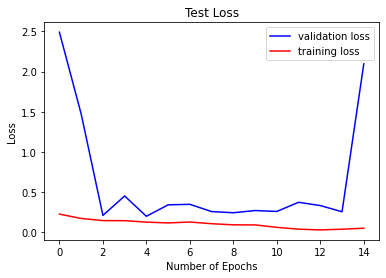

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [114]:
plot_history_loss(history)

Valid data AUC: 0.8529757928555523


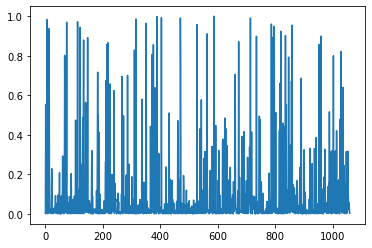

In [115]:
cat_ecg_metrics('DenseNet121', x_valid_redim3, valid_data['y'], workpath)

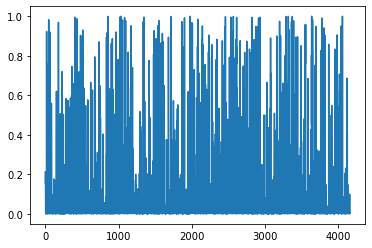

In [116]:
cat_pred_n_save('DenseNet121', x_test_redim3, workpath)

### DenseNet121_02

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.densenet import DenseNet121

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(train_data['y']),
                                                 y = train_data['y'])

print(class_weights)
class_weights = {
    0:0.53681905,
    1:7.28996283}

In [ ]:
model = DenseNet121(include_top=False, weights='imagenet', input_tensor=Input(shape=(1000, 36, 3)))
checkpoint = model_checkpoint('DenseNet121_02', workpath)

In [ ]:
batch_size = 64
epochs = 50

# 定義輸出層
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()])

# model.summary()

In [ ]:
history = model.fit(x_train_redim3, y_train_onthot, 
                    batch_size=batch_size,
                    epochs = epochs,
                    class_weight = class_weights,
                    validation_split=0.2, 
                    steps_per_epoch=x_train_redim3.shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

In [ ]:
plot_history_loss(history)

Valid data AUC: 0.8304714766687085


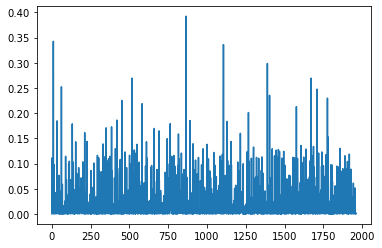

In [43]:
cat_ecg_metrics('DenseNet121_02', x_valid_redim3, valid_data['y'], workpath)

In [ ]:
cat_pred_n_save('DenseNet121_02', x_test_redim3, workpath)

## EfficientNet

### EfficientNetV2B2

In [219]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.applications import EfficientNetV2B2

In [223]:
model = EfficientNetV2B2(include_top=False, weights='imagenet', input_tensor=Input(shape=(600, 36, 3)))
checkpoint = model_checkpoint('EfficientNetV2B2', workpath)

In [224]:
batch_size = 64
epochs = 50

# 定義輸出層
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()])

# model.summary()

In [242]:
history = model.fit(x_train_redim3, y_train_onthot, 
                    batch_size=batch_size,
                    epochs = epochs,
                    # validation_split=0.2, 
                    validation_data=(x_valid_redim3 , y_valid_onthot),
                    steps_per_epoch=x_train_redim3.shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

Epoch 1/50
50/50 [==============================] - ETA: 0s - loss: 0.2175 - auc_7: 0.9694 - binary_accuracy: 0.9277
Epoch 1: val_loss improved from inf to 0.34556, saving model to ./model/model_EfficientNetV2B2.h5
50/50 [==============================] - 32s 446ms/step - loss: 0.2175 - auc_7: 0.9694 - binary_accuracy: 0.9277 - val_loss: 0.3456 - val_auc_7: 0.9727 - val_binary_accuracy: 0.9368 - lr: 0.0010
Epoch 2/50
50/50 [==============================] - ETA: 0s - loss: 0.1677 - auc_7: 0.9816 - binary_accuracy: 0.9370
Epoch 2: val_loss improved from 0.34556 to 0.21894, saving model to ./model/model_EfficientNetV2B2.h5
50/50 [==============================] - 24s 386ms/step - loss: 0.1677 - auc_7: 0.9816 - binary_accuracy: 0.9370 - val_loss: 0.2189 - val_auc_7: 0.9750 - val_binary_accuracy: 0.9370 - lr: 0.0010
Epoch 3/50
50/50 [==============================] - ETA: 0s - loss: 0.1596 - auc_7: 0.9839 - binary_accuracy: 0.9395
Epoch 3: val_loss did not improve from 0.21894
50/50 [=====

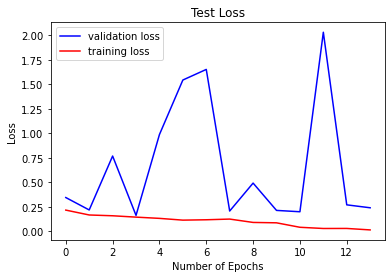

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [243]:
plot_history_loss(history)

Valid data AUC: 0.8903542767664905


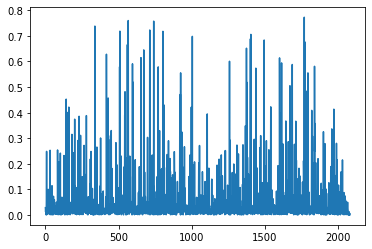

In [244]:
cat_ecg_metrics('EfficientNetV2B2', x_valid_redim3, valid_data['y'], workpath)

In [248]:
model = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'EfficientNetV2B2'))
y_pred = model.predict(x_valid_redim3)
y_pred = y_pred.T[1]

In [252]:
train_meta_valid['Y_PRED'] = y_pred

In [257]:
train_meta_valid['MEAN'] = train_meta_train.groupby('PID')['EF'].mean()

In [258]:
train_meta_valid

,UID,EF,RK,IDX,PID,Y_PRED,MEAN
PID,,,,,,,
P00001,U00004,69.0,4.0,3,P00001,0.028298,66.333333
P00002,U00008,62.0,2.0,5,P00002,0.013054,61.000000
P00005,U00023,66.0,2.0,18,P00005,0.016067,69.000000
P00006,U00027,68.0,2.0,20,P00006,0.002388,55.000000
P00007,U00031,68.0,2.0,22,P00007,0.004107,73.000000
...,...,...,...,...,...,...,...
P03062,U13929,66.0,3.0,9776,P03062,0.000412,67.500000
P03063,U13933,74.0,2.0,9778,P03063,0.007781,69.000000
P03064,U13938,64.0,3.0,9781,P03064,0.001543,75.000000


In [263]:
from xgboost import XGBClassifier, XGBRegressor
import pickle

model_xgb = XGBRegressor(n_estimators=100)
model_xgb.fit(train_meta_valid[['Y_PRED','MEAN']].values, train_meta_valid['EF'])

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [265]:
meta_pred = model_xgb.predict(train_meta_valid[['Y_PRED','MEAN']].values)

In [277]:
meta_pred_sc = 1-((meta_pred - 10)/80)

In [283]:
fpr, tpr, thresholds = metrics.roc_curve(valid_data['y'], meta_pred_sc, pos_label=1)
print('Valid data AUC:',metrics.auc(fpr, tpr))

Valid data AUC: 0.9938148365629282


In [284]:
# testdata

In [286]:
# 預測結果
model = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'EfficientNetV2B2'))
y_pred = model.predict(x_test_redim3)
y_pred = y_pred.T[1]

In [288]:
y_pred.shape

(4162,)

In [314]:
# 找出每筆平均
pid_mean = pd.DataFrame(train_meta.groupby('PID')['EF'].mean())
pid_mean['PID'] = pid_mean.index
pid_mean.reset_index(drop = True, inplace = True)

test_df = pd.merge(test_meta, pid_mean, how = 'left', on="PID")

In [317]:
test_df['Y_PRED'] = y_pred
test_df

,PID,UID,EF,Y_PRED
0,P00001,U00005,67.000000,0.040670
1,P00001,U00006,67.000000,0.027161
2,P00002,U00009,61.500000,0.010683
3,P00002,U00010,61.500000,0.001188
4,P00005,U00024,67.500000,0.044885
...,...,...,...,...
4157,P03064,U13940,71.333333,0.000768
4158,P03068,U13955,65.000000,0.049814
4159,P03068,U13956,65.000000,0.028465
4160,P03069,U13959,76.000000,0.000070


In [318]:
meta_pred = model_xgb.predict(test_df[['Y_PRED','EF']].values)

In [319]:
meta_pred_sc = 1-((meta_pred - 10)/80)

In [321]:
sample_submission = pd.read_csv('%s/sample_submission.csv' % (workpath))
sample_submission['p_LVD'] = meta_pred_sc
sample_submission.to_csv('%s/submit/model_%s.csv' % (workpath, 'model+mean'),index=False)

In [322]:
sample_submission

,UID,p_LVD
0,U00005,0.325967
1,U00006,0.310730
2,U00009,0.324252
3,U00010,0.299079
4,U00024,0.234025
...,...,...
4157,U13940,0.260145
4158,U13955,0.459598
4159,U13956,0.391065
4160,U13959,0.133993


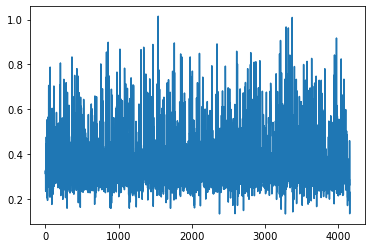

In [325]:
plt.plot(meta_pred_sc)

In [324]:
# cat_pred_n_save('EfficientNetV2B2', x_test_redim3, workpath)

### EfficientNetV2B2_02

In [97]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.models import Model
from tensorflow.keras.applications import EfficientNetV2B2

In [98]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(train_data['y']),
                                                 y = train_data['y'])

print(class_weights)
class_weights = {
    0:0.53681905,
    1:7.28996283}

[0.53465222 7.71454545]


In [99]:
model = EfficientNetV2B2(include_top=False, weights='imagenet', input_tensor=Input(shape=(600, 36, 3)))
checkpoint = model_checkpoint('EfficientNetV2B_02', workpath)

In [100]:
batch_size = 64
epochs = 50

# 定義輸出層
x = model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(2, activation='sigmoid')(x)
model = Model(inputs=model.input, outputs=predictions)

# 編譯模型
model.compile(optimizer=Adam(lr=0.001),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.AUC(),tf.keras.metrics.BinaryAccuracy()])

# model.summary()

In [101]:
history = model.fit(x_train_redim3, y_train_onthot, 
                    batch_size=batch_size,
                    epochs = epochs,
                    class_weight = class_weights,
                    validation_split=0.2, 
                    steps_per_epoch=x_train_redim3.shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

Epoch 1/50


2022-08-09 02:26:19.628338: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.63GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.
2022-08-09 02:26:19.628387: W tensorflow/core/common_runtime/bfc_allocator.cc:275] Allocator (GPU_0_bfc) ran out of memory trying to allocate 3.63GiB with freed_by_count=0. The caller indicates that this is not a failure, but may mean that there could be performance gains if more memory were available.


66/66 [==============================] - ETA: 0s - loss: 0.5514 - auc_2: 0.7800 - binary_accuracy: 0.7166
Epoch 1: val_loss improved from inf to 2.56689, saving model to ./model/model_EfficientNetV2B_02.h5
66/66 [==============================] - 45s 425ms/step - loss: 0.5514 - auc_2: 0.7800 - binary_accuracy: 0.7166 - val_loss: 2.5669 - val_auc_2: 0.0858 - val_binary_accuracy: 0.0671 - lr: 0.0010
Epoch 2/50
66/66 [==============================] - ETA: 0s - loss: 0.4128 - auc_2: 0.8963 - binary_accuracy: 0.8418
Epoch 2: val_loss improved from 2.56689 to 1.94167, saving model to ./model/model_EfficientNetV2B_02.h5
66/66 [==============================] - 22s 329ms/step - loss: 0.4128 - auc_2: 0.8963 - binary_accuracy: 0.8418 - val_loss: 1.9417 - val_auc_2: 0.0749 - val_binary_accuracy: 0.0671 - lr: 0.0010
Epoch 3/50
66/66 [==============================] - ETA: 0s - loss: 0.3903 - auc_2: 0.9002 - binary_accuracy: 0.8276
Epoch 3: val_loss did not improve from 1.94167
66/66 [============

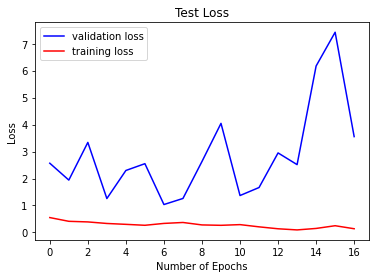

<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.7/site-packages/matplotlib/pyplot.py'>

In [102]:
plot_history_loss(history)

Valid data AUC: 0.7518370073480293


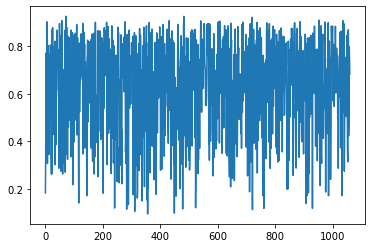

In [103]:
cat_ecg_metrics('EfficientNetV2B_02', x_valid_redim3, valid_data['y'], workpath)

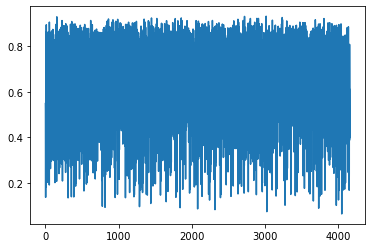

In [104]:
cat_pred_n_save('EfficientNetV2B_02', x_test_redim3, workpath)

## Meta Model

In [ ]:
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt 
%matplotlib inline

import tensorflow as tf
import keras 

import warnings
warnings.filterwarnings("ignore")

workpath = '.'

In [ ]:
x_train_redim3 = np.load("%s/dataset/x_train_redim3.npz" % (workpath))['X']
x_test_redim3 = np.load("%s/dataset/x_test_redim3.npz" % (workpath))['X']
x_valid_redim3 = np.load("%s/dataset/x_valid_redim3.npz" % (workpath))['X']

In [ ]:
print(x_train_redim3.shape)
print(x_test_redim3.shape)
print(x_valid_redim3.shape)

In [ ]:
model_ResNet50V2 = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'ResNet50V2'))
model_ResNet50V2_02 = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'ResNet50V2_02'))
model_DenseNet121 = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'DenseNet121'))
model_DenseNet121_02 = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'DenseNet121_02'))
model_EfficientNetV2B2 = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'EfficientNetV2B2'))
model_EfficientNetV2B2_02 = keras.models.load_model("%s/model/model_%s.h5" % (workpath, 'EfficientNetV2B_02'))

### out-of-fold

In [ ]:
x_meta = pd.DataFrame()

x_meta['y_meta1'] = model_ResNet50V2.predict(x_valid_redim3).T[1]
x_meta['y_meta2'] = model_ResNet50V2_02.predict(x_valid_redim3).T[1]
x_meta['y_meta3'] = model_DenseNet121.predict(x_valid_redim3).T[1]
x_meta['y_meta4'] = model_DenseNet121_02.predict(x_valid_redim3).T[1]
x_meta['y_meta5'] = model_EfficientNetV2B2.predict(x_valid_redim3).T[1]
x_meta['y_meta6'] = model_EfficientNetV2B2_02.predict(x_valid_redim3).T[1]

In [ ]:
from xgboost import XGBClassifier
import pickle

model_xgb = XGBClassifier(n_estimators=100)
model_xgb.fit(x_meta.values, valid_data['y'])

In [ ]:
meta_pred = model_xgb.predict_proba(x_meta.values)

In [ ]:
plt.plot(meta_pred.T[1])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(valid_data['y'], meta_pred.T[1], pos_label=1)
print('Valid data AUC:',metrics.auc(fpr, tpr))

In [ ]:
pickle.dump(model_xgb, open("meta_xgb.pkl", "wb"))

In [ ]:
test_meta = pd.DataFrame()

test_meta['y_meta1'] = model_ResNet50V2.predict(x_test_redim3).T[1]
test_meta['y_meta2'] = model_ResNet50V2_02.predict(x_test_redim3).T[1]
test_meta['y_meta3'] = model_DenseNet121.predict(x_test_redim3).T[1]
test_meta['y_meta4'] = model_DenseNet121_02.predict(x_test_redim3).T[1]
test_meta['y_meta5'] = model_EfficientNetV2B2.predict(x_test_redim3).T[1]
test_meta['y_meta6'] = model_EfficientNetV2B2_02.predict(x_test_redim3).T[1]

In [ ]:
test_meta_pred = model_xgb.predict_proba(test_meta.values)

In [ ]:
plt.plot(test_meta_pred.T[1])

In [ ]:
sample_submission = pd.read_csv('%s/sample_submission.csv' % (workpath))
sample_submission['p_LVD'] = test_meta_pred.T[1]
sample_submission.to_csv('%s/submit/model_%s.csv' % (workpath, 'stacking'),index=False)

### in-of-fold

In [ ]:
x_meta = pd.DataFrame()

x_meta['y_meta1'] = model_ResNet50V2.predict(x_train_redim3).T[1]
x_meta['y_meta2'] = model_ResNet50V2_02.predict(x_train_redim3).T[1]
x_meta['y_meta3'] = model_DenseNet121.predict(x_train_redim3).T[1]
x_meta['y_meta4'] = model_DenseNet121_02.predict(x_train_redim3).T[1]
x_meta['y_meta5'] = model_EfficientNetV2B2.predict(x_train_redim3).T[1]
x_meta['y_meta6'] = model_EfficientNetV2B2_02.predict(x_train_redim3).T[1]

In [ ]:
from xgboost import XGBClassifier
import pickle

model_xgb = XGBClassifier(n_estimators=100)
model_xgb.fit(x_meta.values, train_data['y'])

In [ ]:
pickle.dump(model_xgb, open("meta_xgb2.pkl", "wb"))

In [ ]:
valid_meta = pd.DataFrame()

valid_meta['y_meta1'] = model_ResNet50V2.predict(x_valid_redim3).T[1]
valid_meta['y_meta2'] = model_ResNet50V2_02.predict(x_valid_redim3).T[1]
valid_meta['y_meta3'] = model_DenseNet121.predict(x_valid_redim3).T[1]
valid_meta['y_meta4'] = model_DenseNet121_02.predict(x_valid_redim3).T[1]
valid_meta['y_meta5'] = model_EfficientNetV2B2.predict(x_valid_redim3).T[1]
valid_meta['y_meta6'] = model_EfficientNetV2B2_02.predict(x_valid_redim3).T[1]

In [ ]:
meta_pred = model_xgb.predict_proba(valid_meta.values)

In [ ]:
plt.plot(meta_pred.T[1])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(valid_data['y'], meta_pred.T[1], pos_label=1)
print('Valid data AUC:',metrics.auc(fpr, tpr))

In [ ]:
test_meta = pd.DataFrame()

test_meta['y_meta1'] = model_ResNet50V2.predict(x_test_redim3).T[1]
test_meta['y_meta2'] = model_ResNet50V2_02.predict(x_test_redim3).T[1]
test_meta['y_meta3'] = model_DenseNet121.predict(x_test_redim3).T[1]
test_meta['y_meta4'] = model_DenseNet121_02.predict(x_test_redim3).T[1]
test_meta['y_meta5'] = model_EfficientNetV2B2.predict(x_test_redim3).T[1]
test_meta['y_meta6'] = model_EfficientNetV2B2_02.predict(x_test_redim3).T[1]

In [ ]:
test_meta_pred = model_xgb.predict_proba(test_meta.values)

In [ ]:
plt.plot(test_meta_pred.T[1])

In [ ]:
sample_submission = pd.read_csv('%s/sample_submission.csv' % (workpath))
sample_submission['p_LVD'] = test_meta_pred.T[1]
sample_submission.to_csv('%s/submit/model_%s.csv' % (workpath, 'stacking2'),index=False)

In [71]:
!nvidia-smi

Wed Jul 20 02:39:54 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |    105MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## LSTM

### LSTM01

In [ ]:
from tensorflow.keras.optimizers import RMSprop,Adam
from keras.layers.core import Dense, Dropout, Activation
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional,GRU, BatchNormalization, CuDNNLSTM, Attention

In [ ]:
def lstm_model(input_length, input_dim):

    d=0.2
    model= Sequential()
    model.add(LSTM(64,input_shape=(input_length, input_dim),return_sequences=True))
    model.add(Dropout(d))

    model.add(LSTM(16,return_sequences=False,activation='relu'))
    model.add(Dropout(d))
    
    model.add(Dense(8,activation='relu'))

    model.add(Dense(1,activation='sigmoid'))

    model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999), 
                  metrics=[tf.keras.metrics.AUC()])
    
    return model

In [ ]:
batch_size = 64
epochs = 50

model = lstm_model(1000,12)
checkpoint = model_checkpoint('lstm01', workpath)

model.summary()

In [ ]:
history = model.fit(train_data['X'], train_data['y'], 
                    batch_size=batch_size,
                    epochs = epochs,
                    validation_split=0.2, 
                    steps_per_epoch=train_data['X'].shape[0] // batch_size,
                    callbacks=[checkpoint, estop, reduce_lr])

In [ ]:
plot_history_loss(history)

In [ ]:
ecg_metrics('lstm01', valid_data, workpath)

In [ ]:
pred_n_save('lstm01', test_data['X'], workpath)